In [1]:
import re
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def parse_and_plot_matrices(file_path: str = "", raw_text: str = ""):
    """
    Parses 9x3 projection matrices from a given text or file, and plots them as heatmaps.

    Parameters:
        file_path (str): Path to the file containing projection matrix text.
        raw_text (str): Direct text input of the projection matrices.

    Returns:
        dict: Dictionary mapping node_id to its corresponding 9x3 numpy matrix.
    """
    # Load the text
    if raw_text:
        text = raw_text
    else:
        text = Path(file_path).read_text()

    # Parse the matrices
    def parse_matrices(text: str):
        matrices = {}
        pattern = re.compile(r"Node (\d+).*?(?=Node \d+|$)", re.S)
        for block in pattern.finditer(text):
            node_id = int(block.group(1))
            rows = []
            for line in block.group(0).splitlines():
                line = line.strip()
                if line.startswith("proj"):
                    tokens = line.split()
                    rows.append(list(map(int, tokens[2:5])))
            if len(rows) == 9:
                matrices[node_id] = np.asarray(rows, dtype=int)
        return matrices

    matrices = parse_matrices(text)
    print(f"Parsed {len(matrices)} matrices:", list(matrices.keys()))

    # Set up the color map
    cmap = ListedColormap(["orange", "white", "green"])

    # Plot each matrix
    for node, mat in matrices.items():
        fig, ax = plt.subplots()
        im = ax.imshow(mat, aspect="auto", cmap=cmap, interpolation="none", vmin=-1, vmax=1)
        ax.set_title(f"Node {node}")
        ax.set_xlabel("feature")
        ax.set_ylabel("projection")
        ax.set_xticks(range(mat.shape[1]))
        ax.set_yticks(range(mat.shape[0]))
        cbar = fig.colorbar(im, ax=ax, ticks=[-1, 0, 1])
        cbar.set_label("Projection Weight")
        cbar.ax.set_yticklabels(["-1", "0", "1"])

    plt.show()

    return matrices

In [2]:
# With file path
matrices = parse_and_plot_matrices(file_path="/Users/ariellubonja/prog/randals_lab/oblique_forest_scaling_experiments/oblique_forest_scaling_experiments/results/ydf_projection_matrices/projection_matrices_haberman.txt")

# Or with raw text
# matrices = parse_and_plot_matrices(raw_text="Your raw text here")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ariellubonja/prog/randals_lab/oblique_forest_scaling_experiments/oblique_forest_scaling_experiments/results/ydf_projection_matrices/projection_matrices_haberman.txt'

In [3]:
import re
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def parse_and_plot_matrices(file_path: str = "", raw_text: str = ""):
    """
    Parses projection matrices of arbitrary size from a given text or file, and plots them as heatmaps.

    Parameters:
        file_path (str): Path to the file containing projection matrix text.
        raw_text (str): Direct text input of the projection matrices.

    Returns:
        dict: Dictionary mapping node_id to its corresponding numpy matrix.
    """
    # Load the text
    if raw_text:
        text = raw_text
    else:
        text = Path(file_path).read_text()

    # Parse the matrices
    def parse_matrices(text: str):
        matrices = {}
        pattern = re.compile(r"Node (\d+).*?(?=Node \d+|$)", re.S)
        for block in pattern.finditer(text):
            node_id = int(block.group(1))
            rows = []
            for line in block.group(0).splitlines():
                line = line.strip()
                if line.startswith("proj"):
                    tokens = line.split()
                    values = list(map(int, tokens[2:]))
                    rows.append(values)
            if rows:
                matrices[node_id] = np.array(rows, dtype=int)
        return matrices

    matrices = parse_matrices(text)

    # Print matrix dimensions (assumes all are the same)
    if matrices:
        first_shape = next(iter(matrices.values())).shape
        print(f"Detected matrix dimensions: {first_shape[0]}×{first_shape[1]}")

    print(f"Parsed {len(matrices)} matrices:", list(matrices.keys()))

    # Set up the color map
    cmap = ListedColormap(["orange", "white", "green"])

    # Plot each matrix
    for node, mat in matrices.items():
        fig, ax = plt.subplots()
        im = ax.imshow(mat, aspect="auto", cmap=cmap, interpolation="none", vmin=-1, vmax=1)
        ax.set_title(f"Node {node}")
        ax.set_xlabel("feature")
        ax.set_ylabel("projection")
        ax.set_xticks(range(mat.shape[1]))
        ax.set_yticks(range(mat.shape[0]))
        cbar = fig.colorbar(im, ax=ax, ticks=[-1, 0, 1])
        cbar.set_label("Projection Weight")
        cbar.ax.set_yticklabels(["-1", "0", "1"])

        plt.show()
        plt.close(fig)

    return matrices

Detected matrix dimensions: 1000×2523
Parsed 1 matrices: [0]


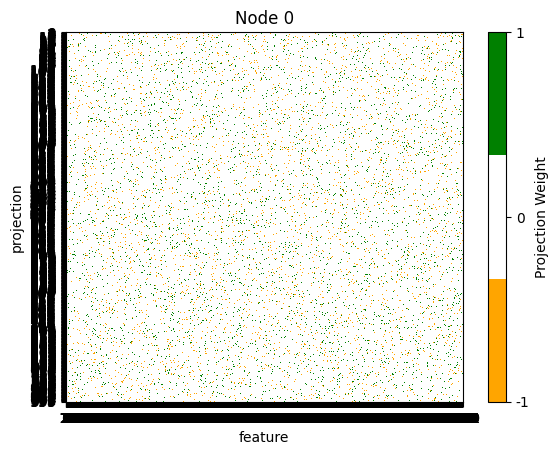

{0: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(1000, 2523))}

In [6]:
parse_and_plot_matrices(file_path="/home/ubuntu/yggdrasil-decision-forests/ariel_results/projection_matrices.txt")

Detected matrix dimensions: 128×2523
Parsed 37 matrices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


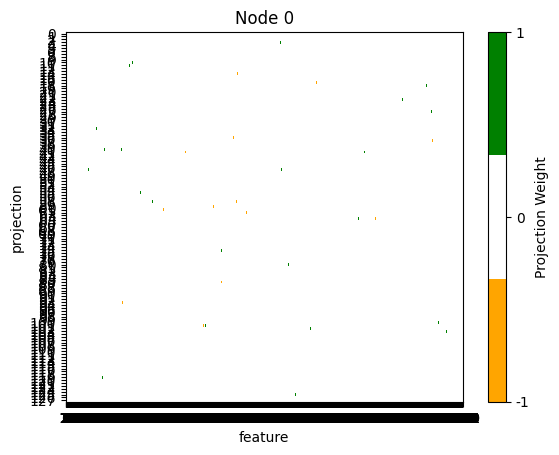

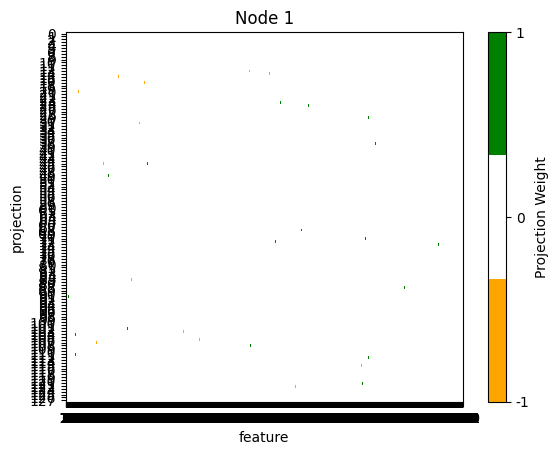

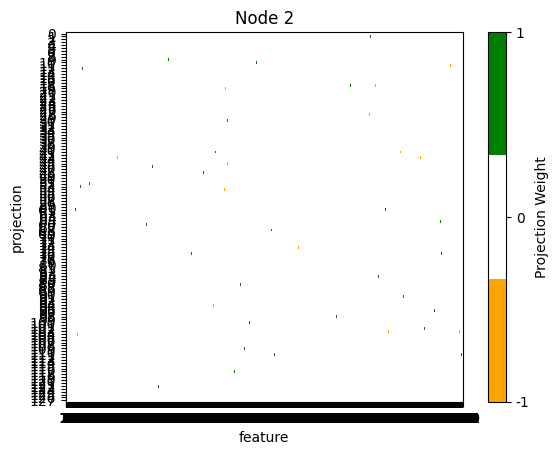

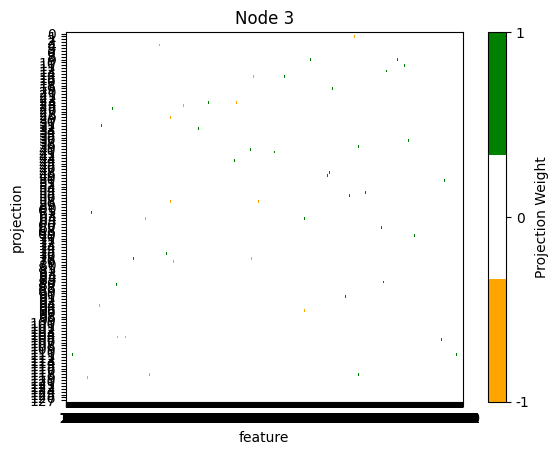

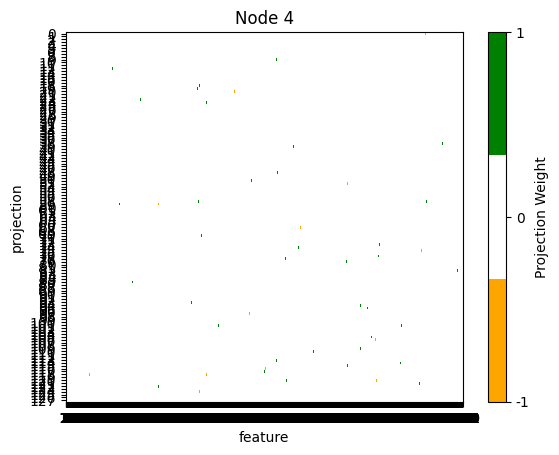

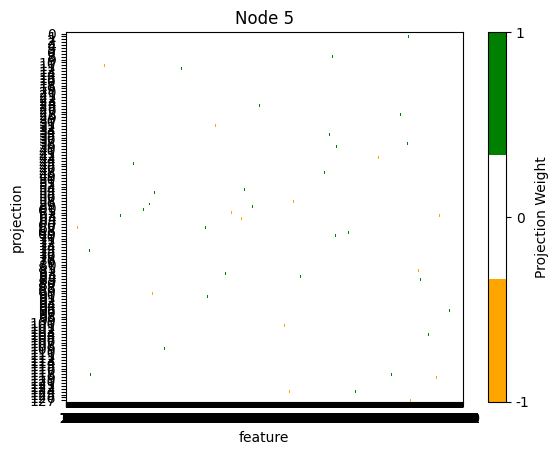

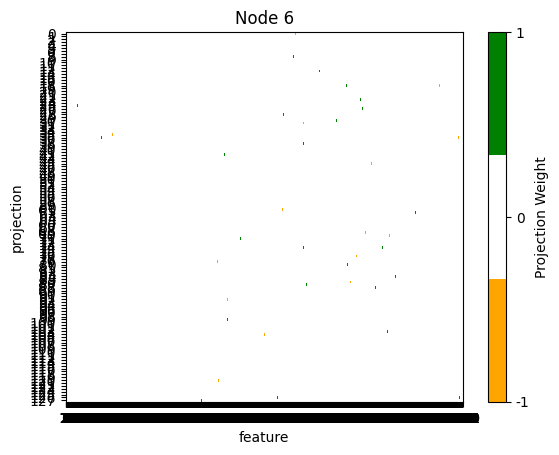

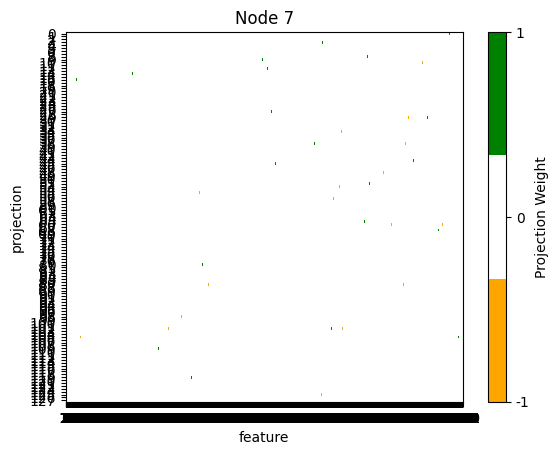

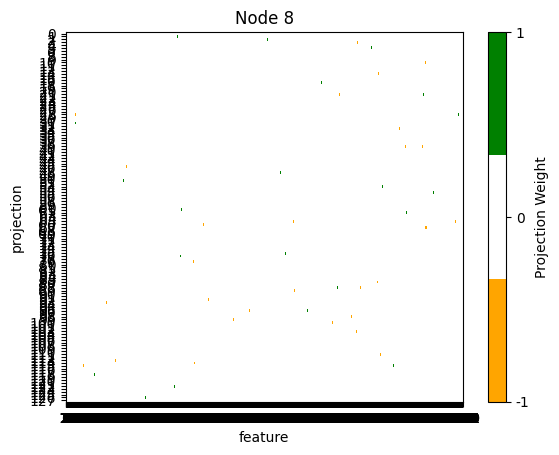

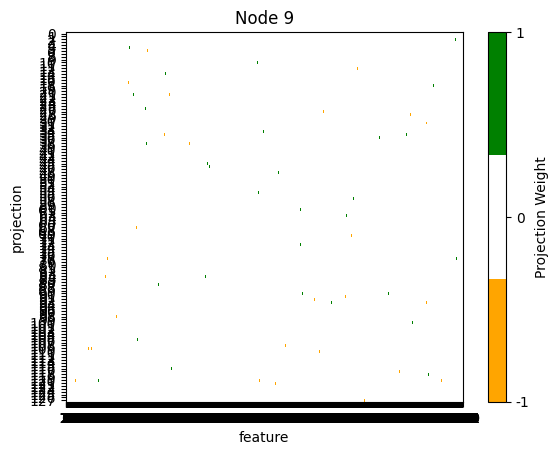

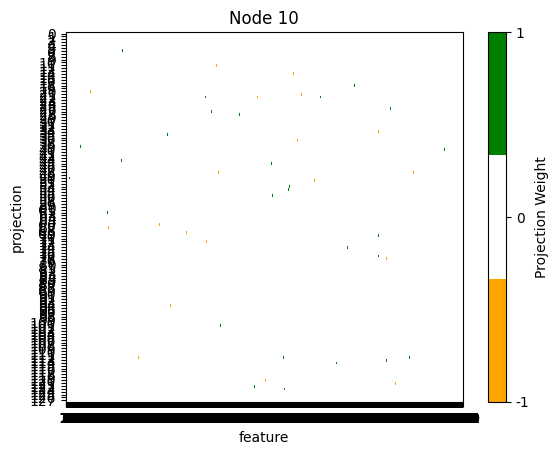

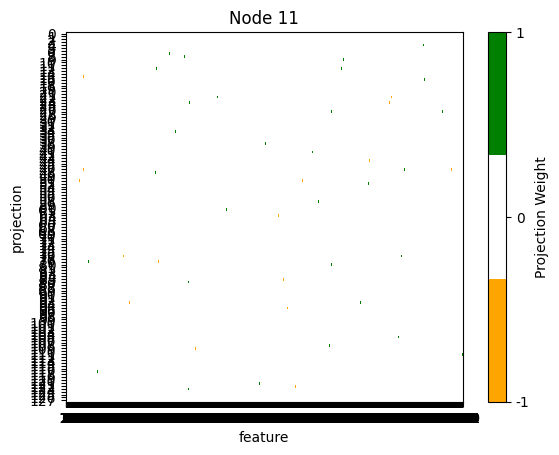

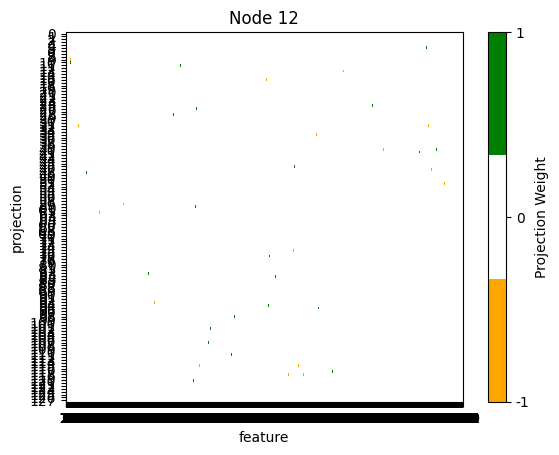

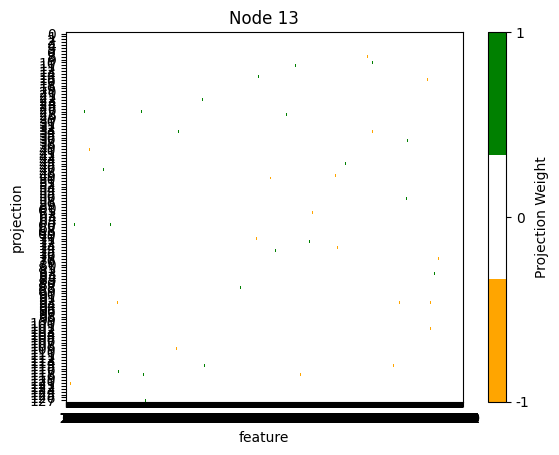

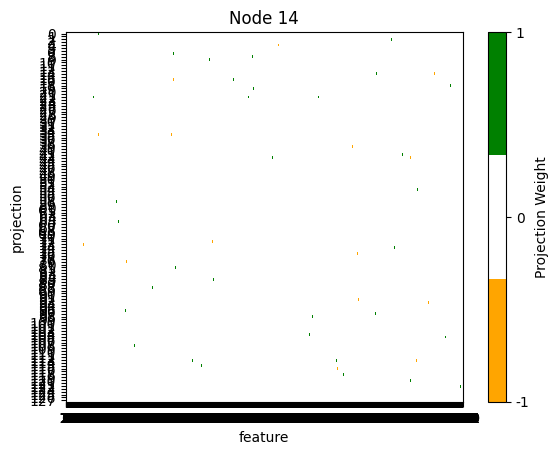

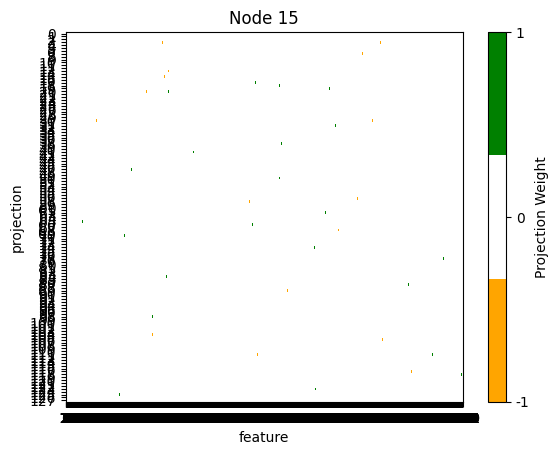

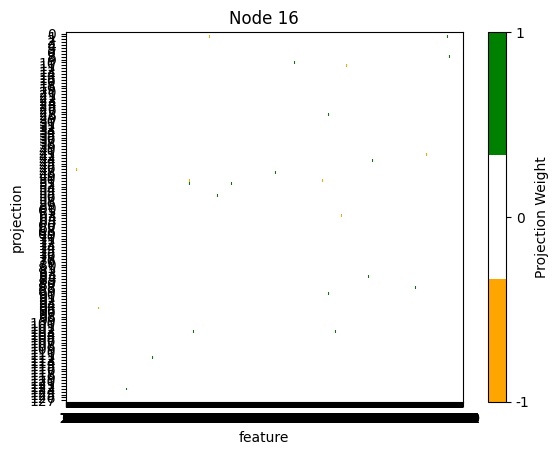

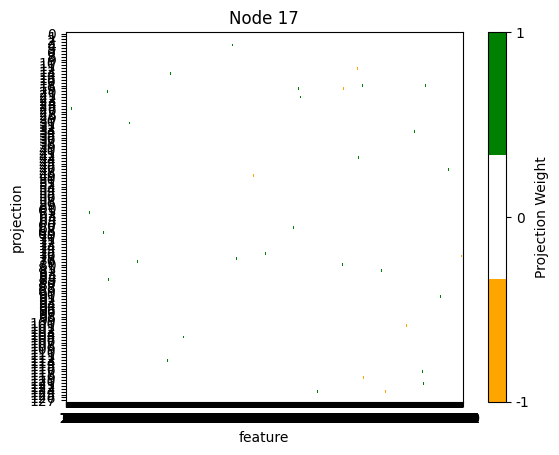

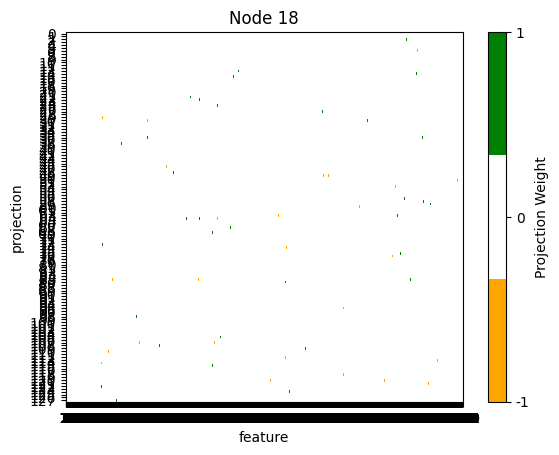

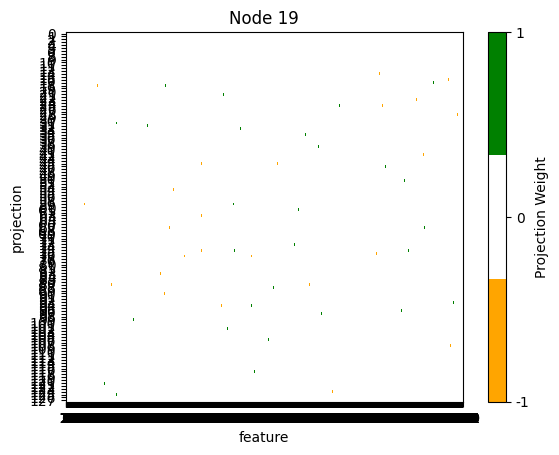

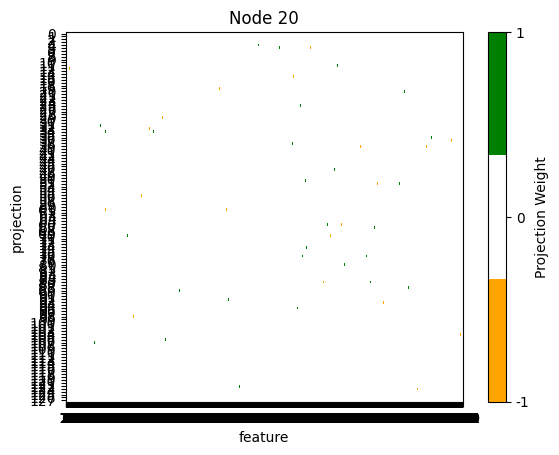

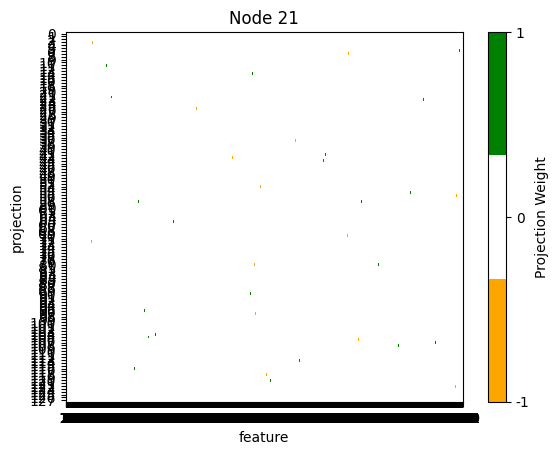

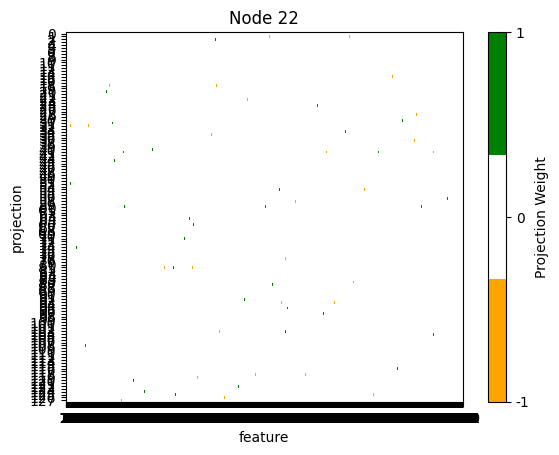

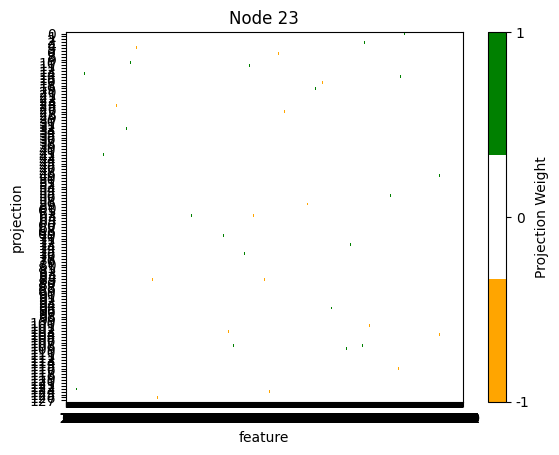

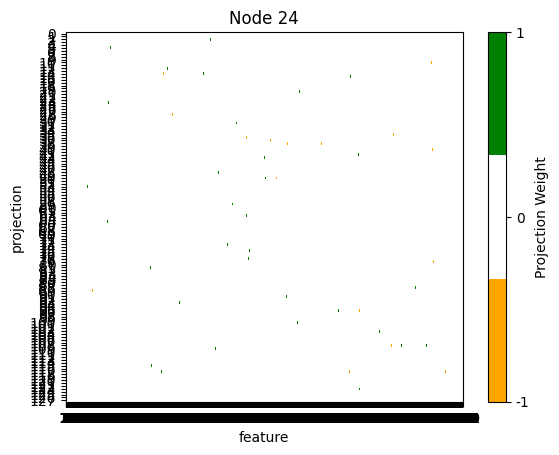

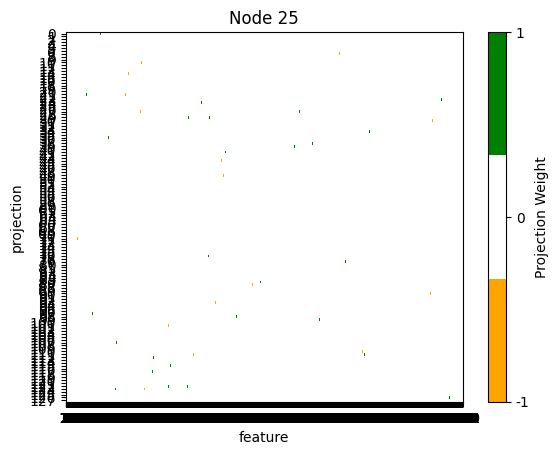

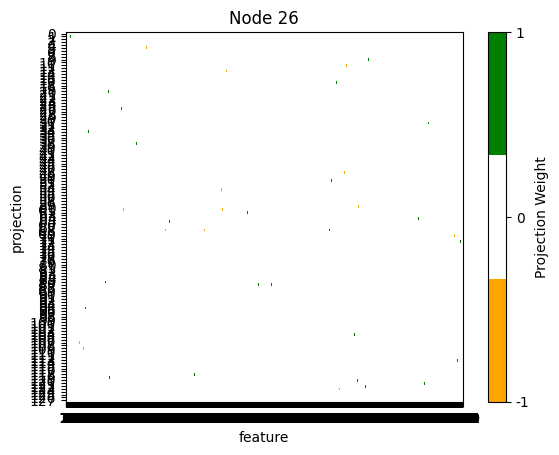

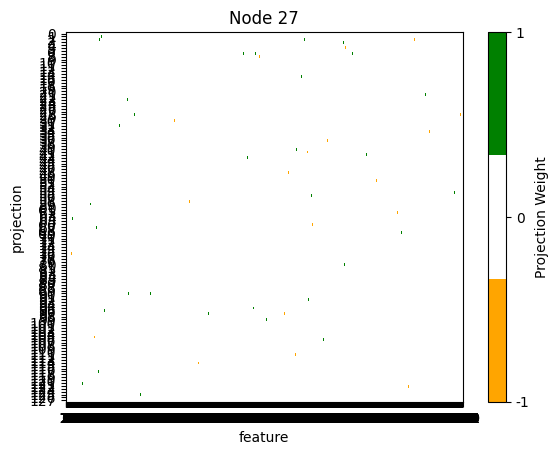

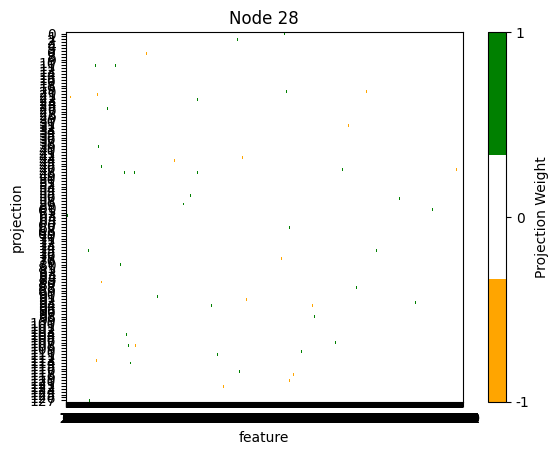

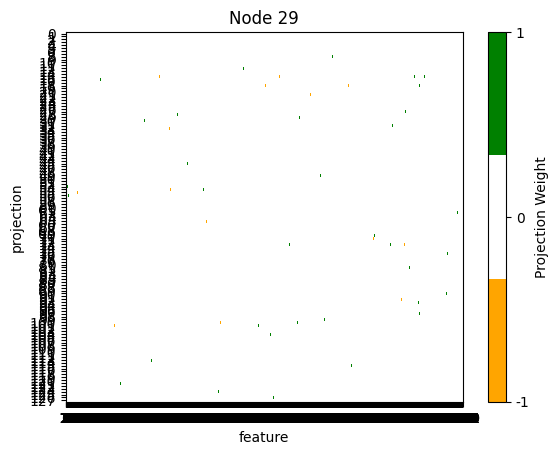

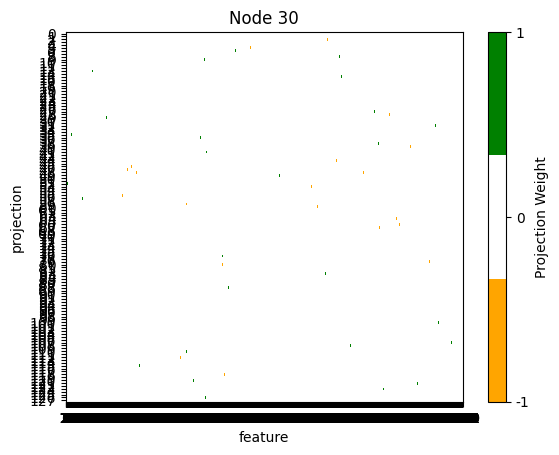

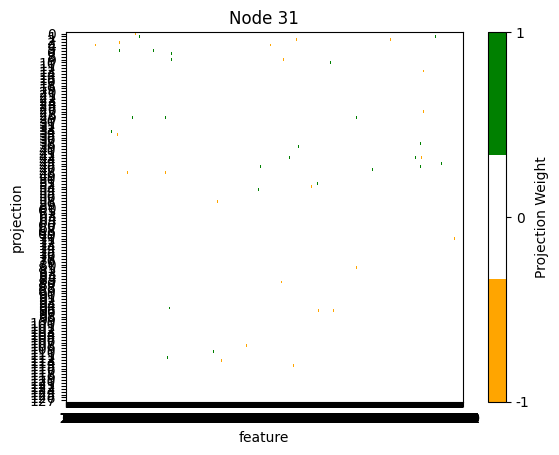

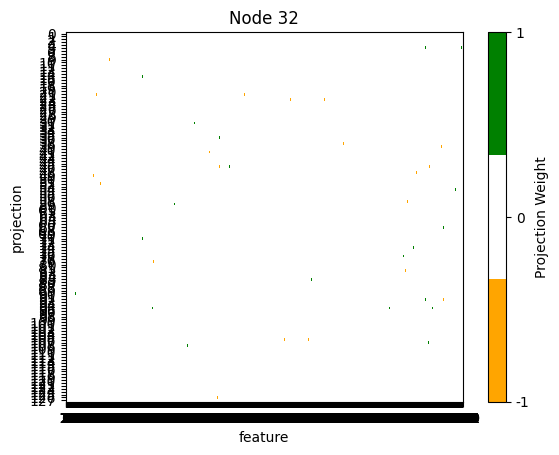

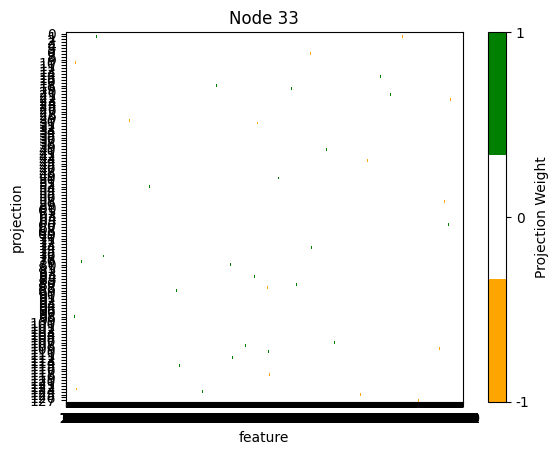

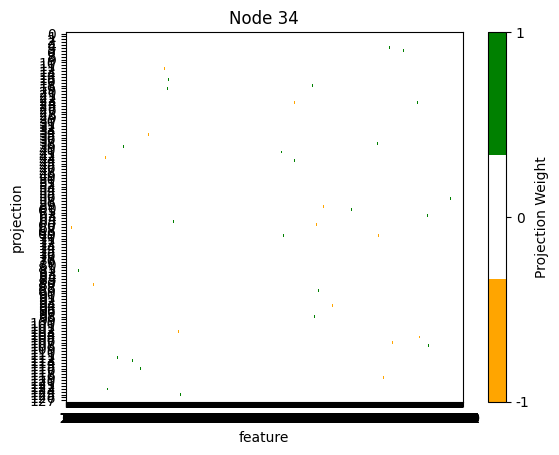

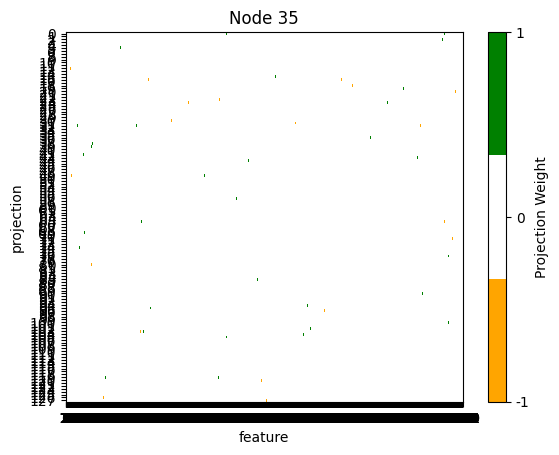

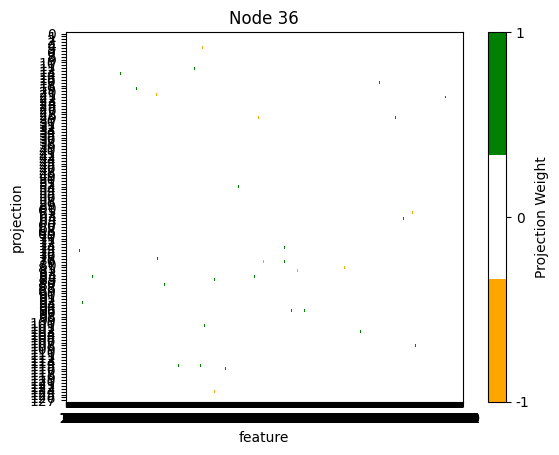

In [ ]:
_ = parse_and_plot_matrices(file_path="/Users/ariellubonja/prog/randals_lab/oblique_forest_scaling_experiments/oblique_forest_scaling_experiments/results/ydf_projection_matrices/projection_matrices_might.txt")